In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

Plot your data

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

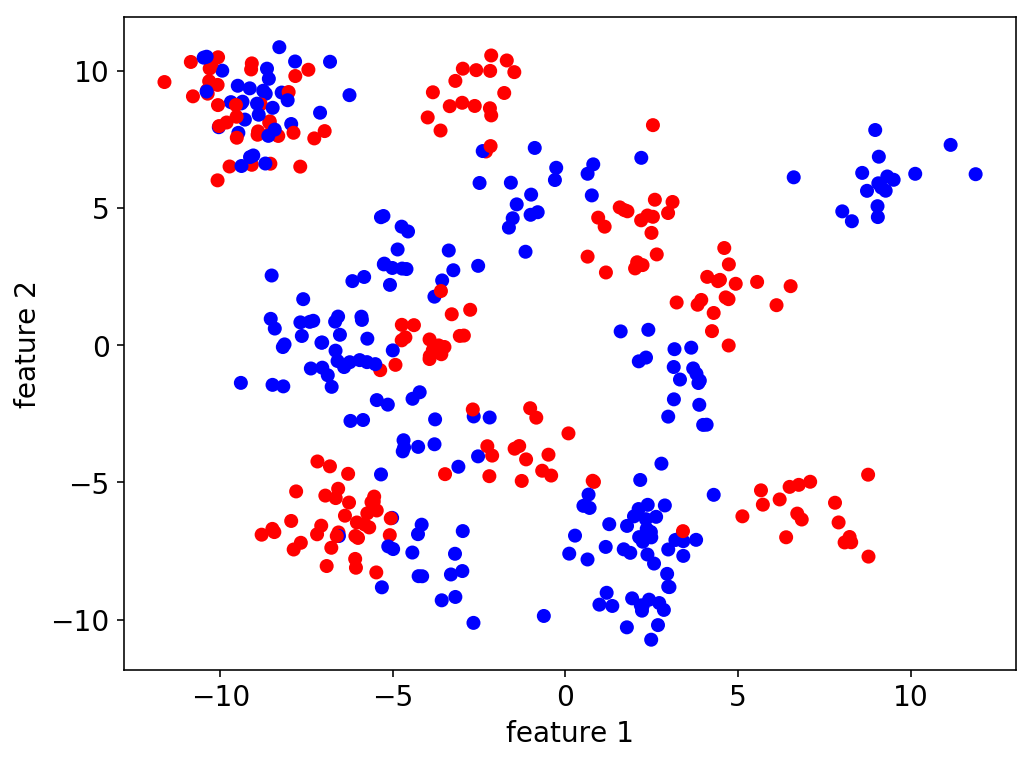

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

Split your dataset into a training and testing set. Comment on how you decided to split your data

In [4]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
print(clf.predict([[10., -5.]]))

['r']


In [5]:
def plot_surface(clf, X, y, n_steps=250, subplot=None, show=True,
                 ylim=None, xlim=None):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if show:
        plt.show()


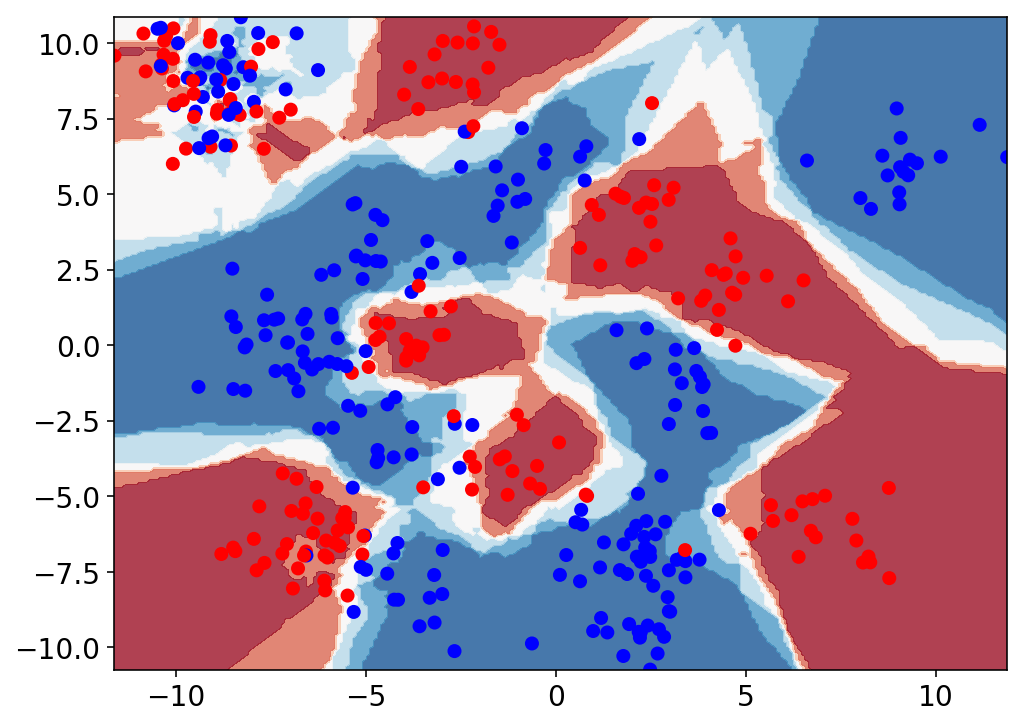

In [6]:
plot_surface(clf, X, y)

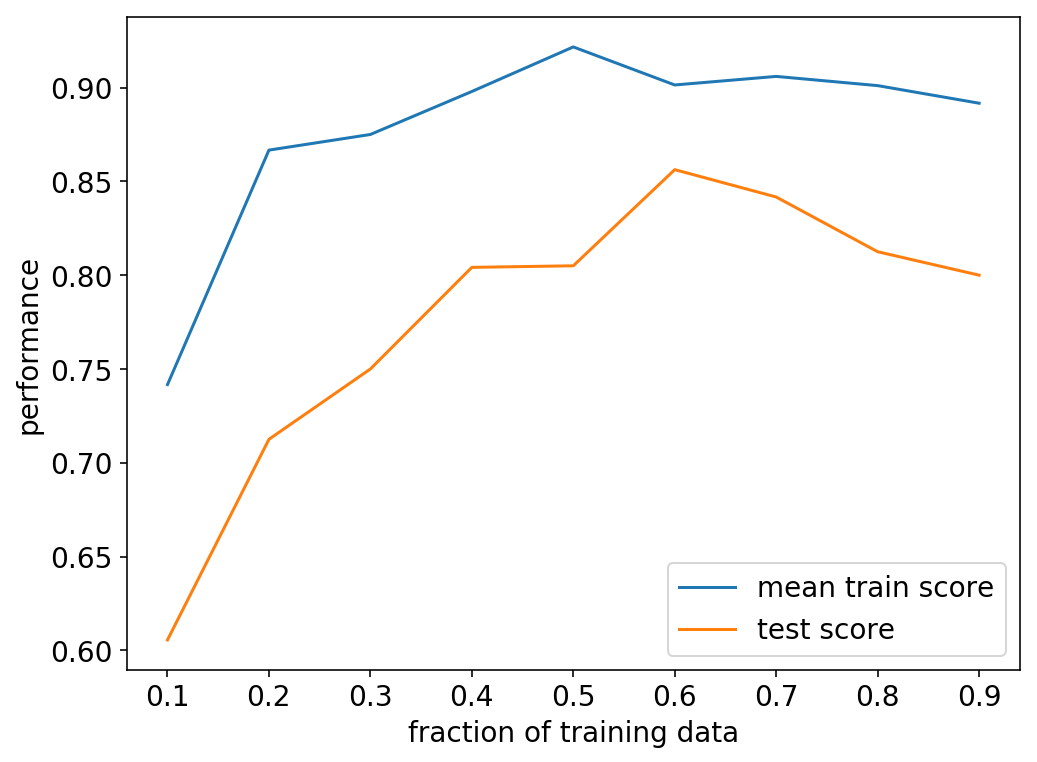

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

train_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mean_train_score = []
mean_test_score = []
test_score = []

for ts in train_size:
    
    #first separate data in training and test data
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=ts)

    # then use cross validation because it is the best way if we don't have a lot of data
    #try kfold (how to decide between all the different methods?)
    kf = KFold(n_splits=4) #this would replace the creation of different datasets: how do we know we 
    #didn't split too much?
    kf.get_n_splits(X_train)
    #print(kf)  

    accuracies_test = []
    accuracies_train = []

    i = 0
    split_idx = []
    train_scores = []
    test_scores = []

    for train_index, test_index in kf.split(X_train):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train_kfold, X_test_kfold = X_train[train_index], X_train[test_index]
        y_train_kfold, y_test_kfold = y_train[train_index], y_train[test_index]


        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(X_train_kfold, y_train_kfold)
        train_scores.append(clf.score(X_train_kfold, y_train_kfold))
        test_scores.append(clf.score(X_test_kfold, y_test_kfold))

        i+=1
        split_idx.append(i)

    
    
    #print('size training set', len(X_train_kfold), 'size testing set', len(X_test_kfold))
    #print('')    
    
    mean_train_score.append(np.mean(train_scores))
    mean_test_score.append(np.mean(test_scores))
    test_score.append(clf.score(X_test, y_test))
    
    #print('*****Evaluating performance with training set fraction of data=', ts, '*****')
    #print('Training dataset:')

    #print('mean train scores:', np.mean(train_scores), 'mean test scores:', np.mean(test_scores))

    #print('Testing dataset:')
    #print('test score:', clf.score(X_test, y_test))
    #print('=====================================================================')
    plt.plot(split_idx, train_scores, c='b', lw=3, alpha=1*ts, label='train score with split '+str(ts))
    plt.plot(split_idx, test_scores, c='r', lw=3, alpha=1*ts, label='test score with split '+str(ts))
    plt.xlabel('Split number')
    plt.ylabel('Score')
    plt.title('Training dataset')
    plt.legend()
    plt.tight_layout()
    #plt.show()
    plt.close()
    
plt.plot(train_size, mean_train_score, label='mean train score')
plt.plot(train_size, test_score, label='test score')
plt.xlabel('fraction of training data')
plt.ylabel('performance')
plt.title('')
plt.legend(loc='best')


We can see from the above plot that the best point is when we use 60% of the data as training.

KFold(n_splits=4, random_state=None, shuffle=False)


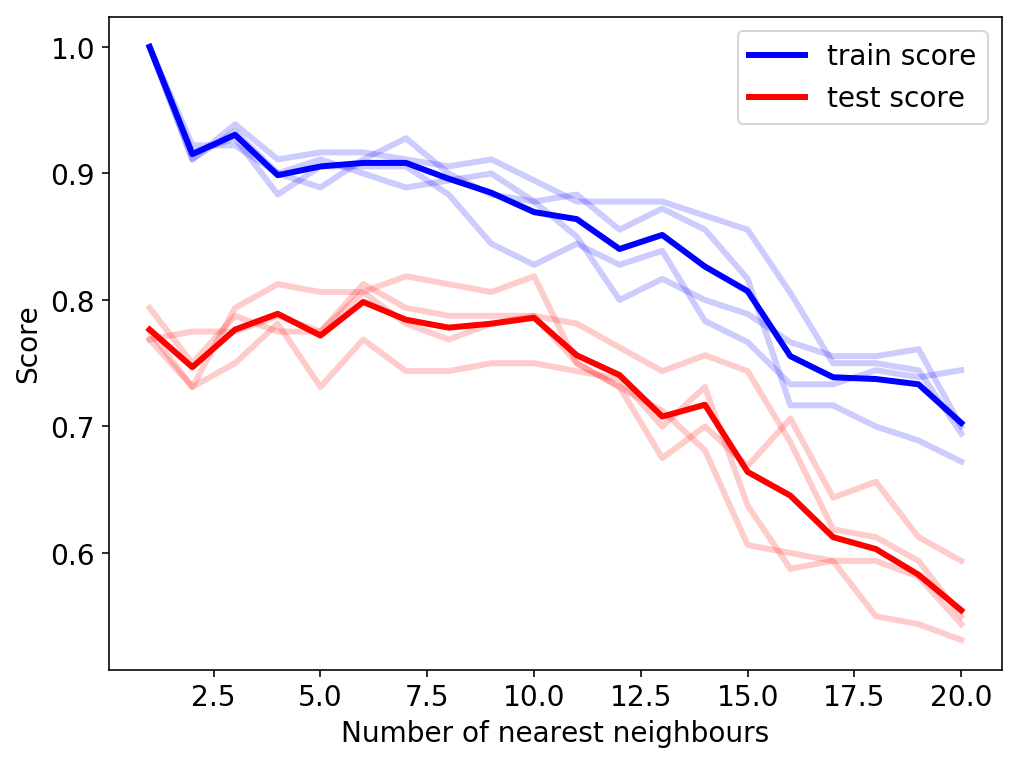

In [13]:
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.6)

kf = KFold(n_splits=4) 
kf.get_n_splits(X_train)
print(kf)  

accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

for train_index, test_index in kf.split(X_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kfold, X_test_kfold = X_train[train_index], X_train[test_index]
    y_train_kfold, y_test_kfold = y_train[train_index], y_train[test_index]
    
    #print('size training set', len(X_train_kfold), 'size testing set', len(X_test_kfold))
    
    train_scores = []
    test_scores = []
    
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train_kfold, y_train_kfold)
        train_scores.append(clf.score(X_train_kfold, y_train_kfold))
        test_scores.append(clf.score(X_test, y_test))
        
    
    plt.plot(ks, train_scores, c='b', alpha=0.2, lw=3)
    plt.plot(ks, test_scores, c='r', alpha=0.2, lw=3)
    plt.xlabel('Number of nearest neighbours')
    plt.ylabel('Score')
    
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)

    
    
plt.plot(ks, np.array(accuracies_train).mean(axis=0), c='b', lw=3, label='train score')
plt.plot(ks, np.array(accuracies_test).mean(axis=0), c='r', lw=3, label='test score')
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Score')
plt.legend()

The performance of both training and testing set follow the same trend except for low values of nearest neighbors. 
The test score seems to be quite flat between 7 and 10, so I would say somewhere within those values.Would need more and better tests to be sure. 

In [9]:
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# set of parameters we want to try
param_grid = {'n_neighbors':  np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.850
best parameters: {'n_neighbors': 11}
test-set score: 0.890


With this test, seems that the best value for n_neighbors is actually 11.